In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/SMA Practice/Dataset/engagement.csv')
df

,text,retweets,favorites
0,Great news! We just launched a new product tha...,23,45
1,I can't believe how amazing this concert was. ...,65,120
2,Terrible service at this restaurant. Do not re...,12,7
3,Just finished reading a fantastic book. Highly...,8,18
4,I'm so excited to announce that I'll be speaki...,42,82
5,Absolutely loving this new movie. The cinemato...,35,60
6,Disappointed with the customer service I recei...,16,4
7,New blog post is up! Check it out for some gre...,10,15


In [5]:
df["polarity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df

,text,retweets,favorites,polarity
0,Great news! We just launched a new product tha...,23,45,0.585227
1,I can't believe how amazing this concert was. ...,65,120,0.800000
2,Terrible service at this restaurant. Do not re...,12,7,-1.000000
3,Just finished reading a fantastic book. Highly...,8,18,0.300000
4,I'm so excited to announce that I'll be speaki...,42,82,0.468750
5,Absolutely loving this new movie. The cinemato...,35,60,0.412121
6,Disappointed with the customer service I recei...,16,4,-0.750000
7,New blog post is up! Check it out for some gre...,10,15,0.485227


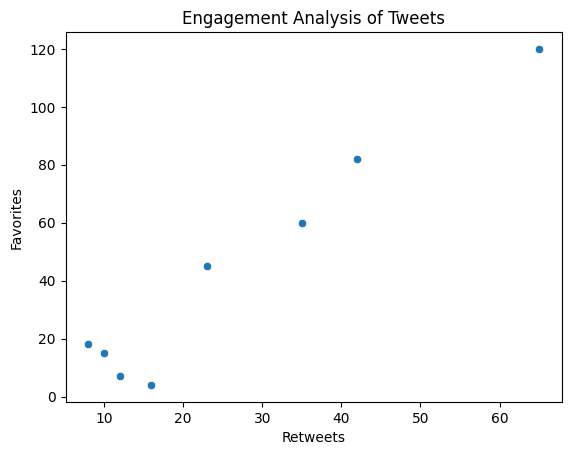

In [6]:
# Create a scatter plot of retweets vs. favorites to see how users engage with the content
sns.scatterplot(x="retweets", y="favorites", data=df)
plt.xlabel("Retweets")
plt.ylabel("Favorites")
plt.title("Engagement Analysis of Tweets")
plt.show()

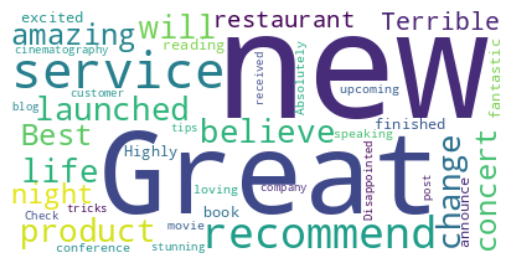

In [7]:
# Create a bar chart of the most common words in the tweet text
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color="steelblue")
wordcloud.generate(" ".join(df["text"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

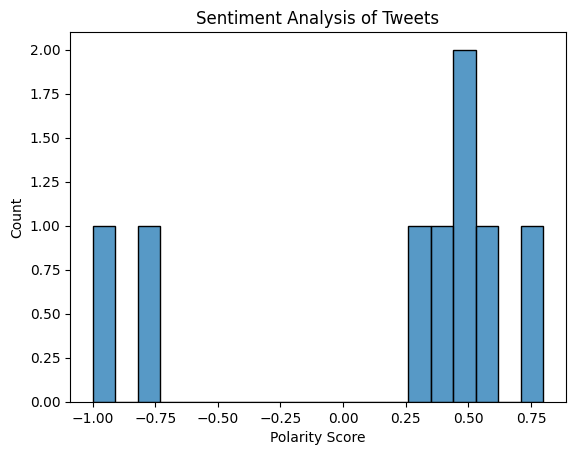

In [8]:
# Create a histogram of the polarity scores to see the distribution of sentiment in the dataset
sns.histplot(data=df, x="polarity", bins=20)
plt.xlabel("Polarity Score")
plt.ylabel("Count")
plt.title("Sentiment Analysis of Tweets")
plt.show()

In [9]:
import pandas as pd

# Create sample dataset
data = {'user_id': [1, 2, 3, 4, 5],
        'tweet_id': [101, 102, 103, 104, 105],
        'likes': [10, 15, 20, 25, 30],
        'retweets': [2, 4, 6, 8, 10],
        'replies': [1, 3, 5, 7, 9]}
df = pd.DataFrame(data)

# Calculate engagement score
df['engagement_score'] = df['likes'] + df['retweets'] + df['replies']

# Group by user and calculate average engagement score
grouped = df.groupby('user_id')['engagement_score'].mean()

# Sort by average engagement score
sorted_grouped = grouped.sort_values(ascending=False)

# Print the sorted group
print(sorted_grouped)

user_id
5    49.0
4    40.0
3    31.0
2    22.0
1    13.0
Name: engagement_score, dtype: float64


In [10]:
import pandas as pd

# Example dataset of tweets and engagement metrics
data = {
    'tweet_id': [1, 2, 3, 4, 5],
    'text': ['I love this product!', 'This movie was terrible.', 'I can\'t wait to go on vacation!', 
             'Traffic today was a nightmare.', 'The food at this restaurant was amazing!'],
    'retweets': [10, 5, 20, 2, 15],
    'favorites': [25, 10, 30, 5, 20],
    'replies': [5, 2, 10, 1, 8]
}

df = pd.DataFrame(data)

# Calculate engagement rate for each tweet
df['engagement_rate'] = (df['retweets'] + df['favorites'] + df['replies']) / df['retweets']

# Group tweets by their engagement rate
engagement_groups = pd.cut(df['engagement_rate'], bins=[0, 1, 2, 3], labels=['low', 'medium', 'high'])
df['engagement_group'] = engagement_groups

# Print out the average retweets, favorites, and replies for each engagement group
grouped = df.groupby('engagement_group')
print(grouped['retweets', 'favorites', 'replies'].mean())

                  retweets  favorites  replies
engagement_group                              
low                    NaN        NaN      NaN
medium                 NaN        NaN      NaN
high                  17.5       25.0      9.0


<ipython-input-10-0f1f378cea08>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(grouped['retweets', 'favorites', 'replies'].mean())
